In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/Cars-RF.csv')
print(df)

      vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]


In [ ]:
# Convert the dictionary into DataFrame
rankings_pd = pd.DataFrame(df)

# Before renaming the columns
print(rankings_pd.columns)

rankings_pd.set_axis(['Buying', 'Maintanence', 'Doors','Persons','lug_boot','Safety','Class Values'], axis='columns', inplace=True)

# After renaming the columns
print(rankings_pd.columns)
rankings_pd.head()

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')
Index(['Buying', 'Maintanence', 'Doors', 'Persons', 'lug_boot', 'Safety',
       'Class Values'],
      dtype='object')


<ipython-input-6-5d81055990d6>:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rankings_pd.set_axis(['Buying', 'Maintanence', 'Doors','Persons','lug_boot','Safety','Class Values'], axis='columns', inplace=True)


,Buying,Maintanence,Doors,Persons,lug_boot,Safety,Class Values
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Buying        1727 non-null   object
 1   Maintanence   1727 non-null   object
 2   Doors         1727 non-null   object
 3   Persons       1727 non-null   object
 4   lug_boot      1727 non-null   object
 5   Safety        1727 non-null   object
 6   Class Values  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:

df.shape

(1727, 7)

In [ ]:

df.describe()

,Buying,Maintanence,Doors,Persons,lug_boot,Safety,Class Values
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:

df.nunique()

Buying          4
Maintanence     4
Doors           4
Persons         3
lug_boot        3
Safety          3
Class Values    4
dtype: int64

In [ ]:

df.isnull().sum()

Buying          0
Maintanence     0
Doors           0
Persons         0
lug_boot        0
Safety          0
Class Values    0
dtype: int64

In [ ]:
df.value_counts()

Buying  Maintanence  Doors  Persons  lug_boot  Safety  Class Values
high    high         2      2        big       high    unacc           1
med     med          4      more     small     med     acc             1
                                               high    acc             1
                                     med       med     acc             1
                                               low     unacc           1
                                                                      ..
low     low          3      2        med       med     unacc           1
                                               low     unacc           1
                                               high    unacc           1
                                     big       med     unacc           1
vhigh   vhigh        5more  more     small     med     unacc           1
Length: 1727, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class Values'], axis=1), df['Class Values'], test_size=0.4, random_state=0)

# Check the shape of X_train and X_test
print("X_train", X_train.shape)
print("X_test", X_test.shape)

# Check the shape of X_train and X_test
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# Check data types of variables
print(X_train.dtypes)


X_train (1036, 7)
X_test (691, 7)
X_train: (1036, 7) X_test: (691, 7)
Buying          object
Maintanence     object
Doors           object
Persons         object
lug_boot        object
Safety          object
endcoded       float64
dtype: object


X_train :  (1640, 5)
X_test :  (87, 5)
y_train :  (1640, 1)
y_test :  (87, 1)


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
encoder = OrdinalEncoder()
# Fit the encoder
encoder.fit(asarray(df['Class Values']).reshape(-1,1))

# Transform the dataset
df['endcoded'] = encoder.transform(asarray(df['Class Values']).reshape(-1,1))
df
# Import libraries
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to all categorical variables
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

       Feature  Importance
6     endcoded    0.716143
3      Persons    0.092074
5       Safety    0.088099
0       Buying    0.038478
1  Maintanence    0.034273
4     lug_boot    0.021190
2        Doors    0.009743


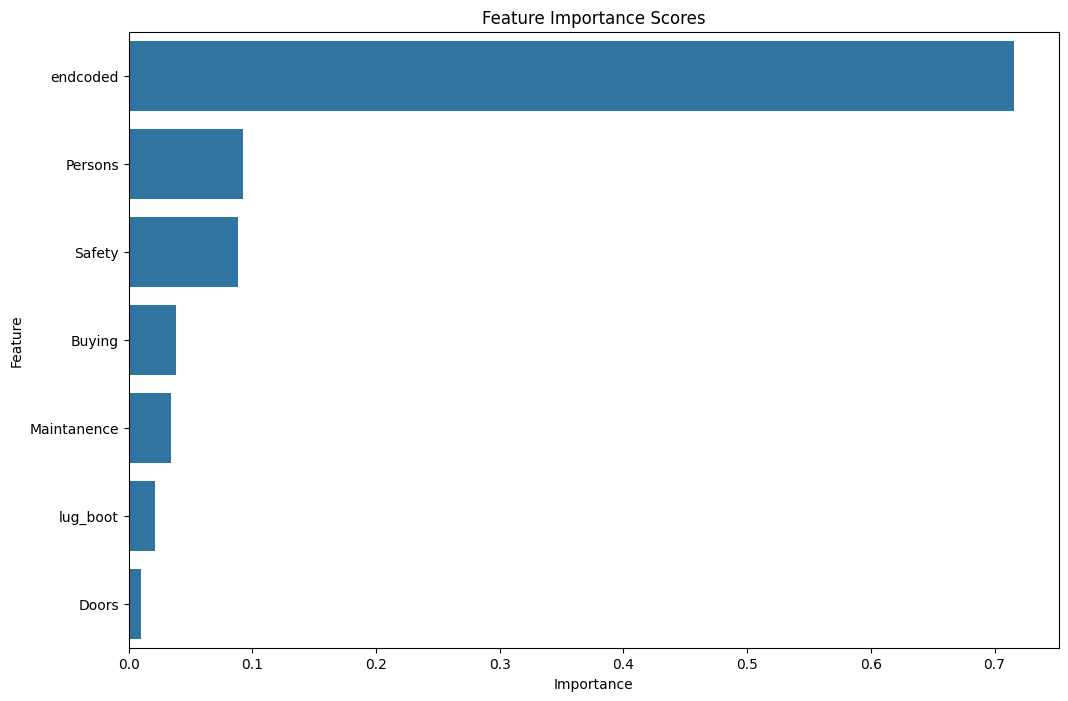

[[157   0   0   0]
 [  0  28   0   0]
 [  0   0 473   0]
 [  0   0   0  33]]
              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       157
        good       1.00      1.00      1.00        28
       unacc       1.00      1.00      1.00       473
       vgood       1.00      1.00      1.00        33

    accuracy                           1.00       691
   macro avg       1.00      1.00      1.00       691
weighted avg       1.00      1.00      1.00       691



In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier with default parameters
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Initialize Random Forest Classifier with n_estimators = 100
rf_100 = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf_100.fit(X_train, y_train)

# Extract feature importance scores using a trained Random Forest Classifier model
importance_scores = rf_100.feature_importances_

# Create a dataframe to display feature importance scores in descending order
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display feature importance scores
print(feature_importance_df)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance scores to understand the relative importance of different features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Scores')
plt.show()

# Select top 3 features based on feature importance scores
selected_features = feature_importance_df['Feature'][:3]

# Create a new dataframe withonly the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize Random Forest Classifier with n_estimators = 100
rf_selected = RandomForestClassifier(n_estimators=100)

# Fit the model to the selected features
rf_selected.fit(X_train_selected, y_train)

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, rf_selected.predict(X_test_selected)))

# Compute classification report
class_report = classification_report(y_test, rf_selected.predict(X_test_selected))

# Display classification report
print(class_report)